# 0.) Import and Clean data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
countries = df['country'].copy
X = df.drop(['country'], axis=1)

In [5]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [6]:
kmeans = KMeans(n_clusters=5).fit(X_scaled)

# 2.) Pick two features to visualize across

In [7]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

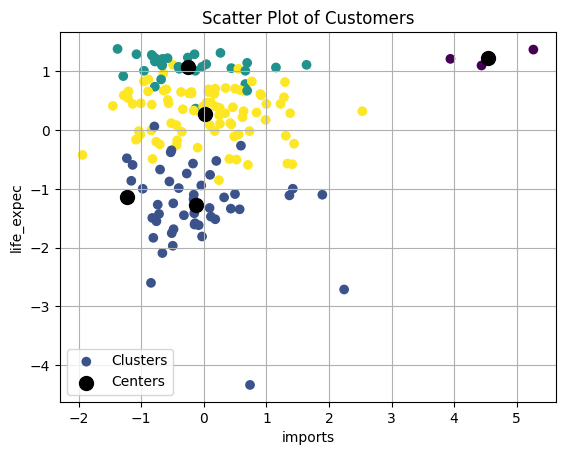

In [8]:
import matplotlib.pyplot as plt

x1_index = 3
x2_index = 6


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [9]:
WCSSs = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [10]:
WCSSs

[1503.0000000000002,
 1050.2145582853304,
 831.4244352086874,
 700.5788804335948,
 627.9082630842897,
 577.3891240637039,
 511.19275363976635,
 458.3656308876282,
 427.20979258225975,
 395.61169872959533,
 376.76358510508294,
 353.38170595451356,
 334.17876471618865,
 323.3422366759326]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

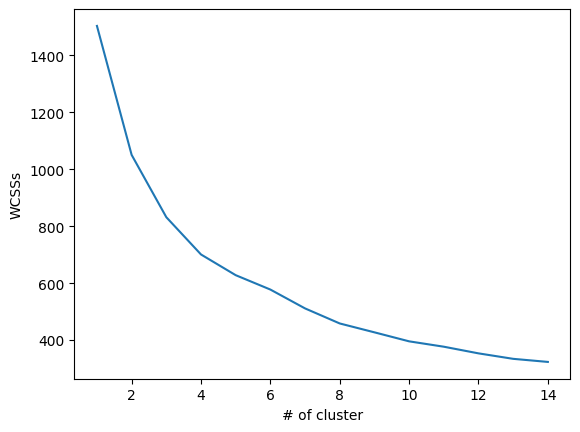

In [11]:
plt.plot(K, WCSSs)
plt.xlabel('# of cluster')
plt.ylabel('WCSSs')
plt.show()

# 6.) Do the same for a silhoutte plot

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
SCs = []
K = range(2, 15)
for k in K:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    SCs.append(silhouette_score(X_scaled, kmeans.labels_))

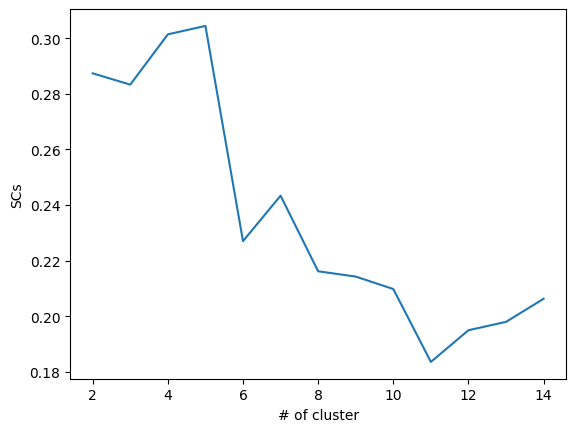

In [14]:
plt.plot(K, SCs)
plt.xlabel('# of cluster')
plt.ylabel('SCs')
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [15]:
kmeans = KMeans(n_clusters = 2, n_init = 30, init = "random").fit(X_scaled)

In [16]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [17]:
output = pd.concat([preds, df], axis = 1)

In [18]:
print("Cluster 1:", "\n", output.loc[output[0] == 0, "country"])

Cluster 1: 
 0      Afghanistan
3           Angola
12      Bangladesh
17           Benin
19         Bolivia
          ...     
155         Uganda
161     Uzbekistan
162        Vanuatu
165          Yemen
166         Zambia
Name: country, Length: 68, dtype: object


In [24]:
print("Cluster 2:", "\n", output.loc[output[0] == 1, "country"])

Cluster 2: 
 1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
158         United Kingdom
159          United States
160                Uruguay
163              Venezuela
164                Vietnam
Name: country, Length: 99, dtype: object


#### Write an observation
There are more developed countries in cluster2 than cluster1.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [20]:
output.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [21]:
output.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

Group 0 generally has higher child mortality and inflation, while group 1 has higher income and gdp per person. This implies that group 0 has more developed countries. Also, group 1 has larger standard deviation compared to group 1 with respect to income and gdpp, indicating group 1 has countries in different developed levels.